In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df = pd.read_csv("C:/Users/SanhDang/Downloads/macro_data_25yrs.csv")  

# Overview of the data
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1890 non-null   object 
 1   M2_Money_Supply     1890 non-null   float64
 2   10Y Treasury Yield  1890 non-null   float64
 3   Fed Funds Rate      1890 non-null   float64
 4   CPI                 1890 non-null   float64
 5   Inflation_Rate_%    1890 non-null   float64
 6   SOFR                1809 non-null   float64
dtypes: float64(6), object(1)
memory usage: 103.5+ KB
None
       M2_Money_Supply  10Y Treasury Yield  Fed Funds Rate          CPI  \
count      1890.000000         1890.000000     1890.000000  1890.000000   
mean      19039.955926            2.761429        2.496709   282.100917   
std        2860.222901            1.265754        2.001706    24.839167   
min       13993.900000            0.620000        0.050000   250.227000   
25%       15416.800

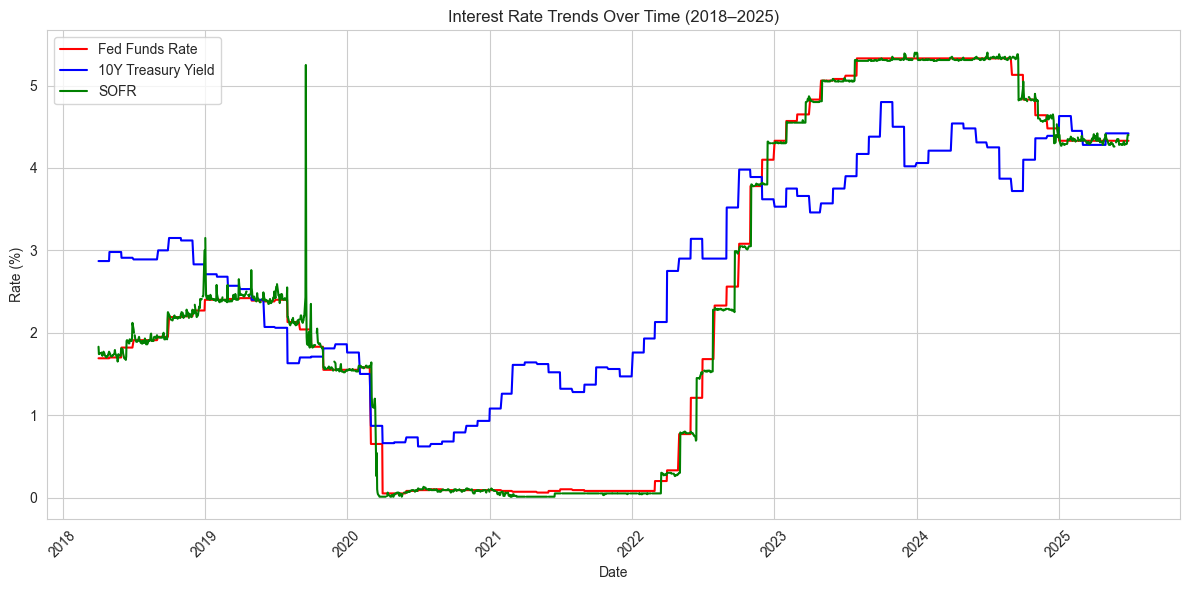

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Fed Funds Rate'], label='Fed Funds Rate', color='red')
plt.plot(df['Date'], df['10Y Treasury Yield'], label='10Y Treasury Yield', color='blue')
plt.plot(df['Date'], df['SOFR'], label='SOFR', color='green')

plt.title("Interest Rate Trends Over Time (2018–2025)")
plt.xlabel("Date")
plt.ylabel("Rate (%)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

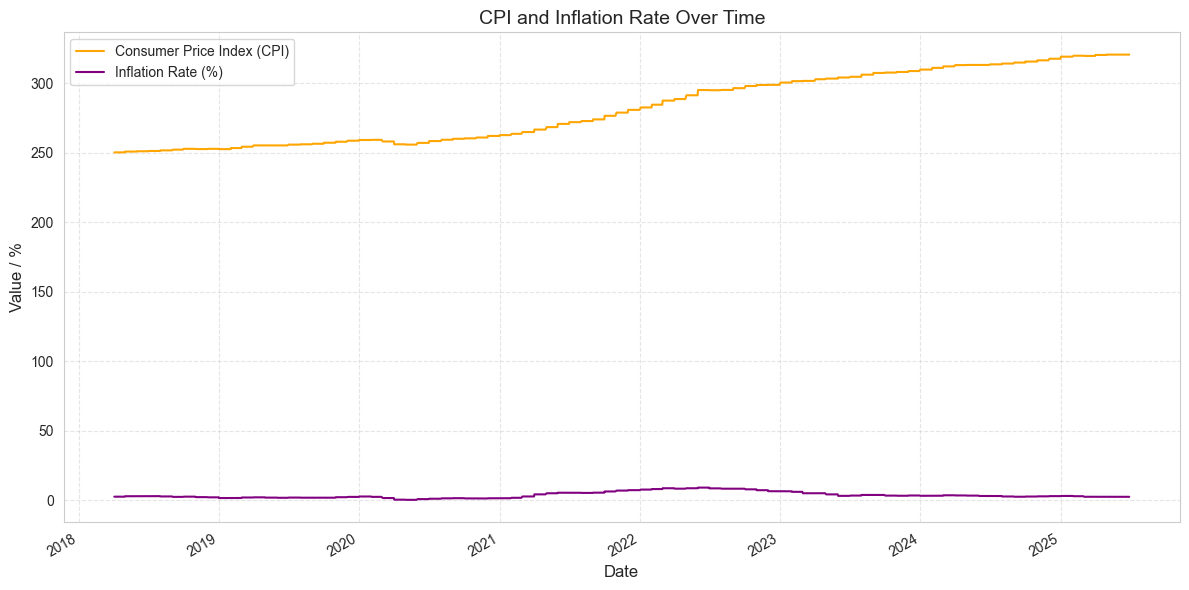

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ CPI và Inflation Rate
plt.plot(df['Date'], df['CPI'], label='Consumer Price Index (CPI)', color='orange')
plt.plot(df['Date'], df['Inflation_Rate_%'], label='Inflation Rate (%)', color='purple')

# Tiêu đề và nhãn
plt.title("CPI and Inflation Rate Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value / %", fontsize=12)

# Cải thiện định dạng trục x
plt.xticks(rotation=45)
plt.gcf().autofmt_xdate()  # Auto format date labels
plt.tight_layout()

# Giao diện đẹp hơn
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.style.use('ggplot')  
plt.show()


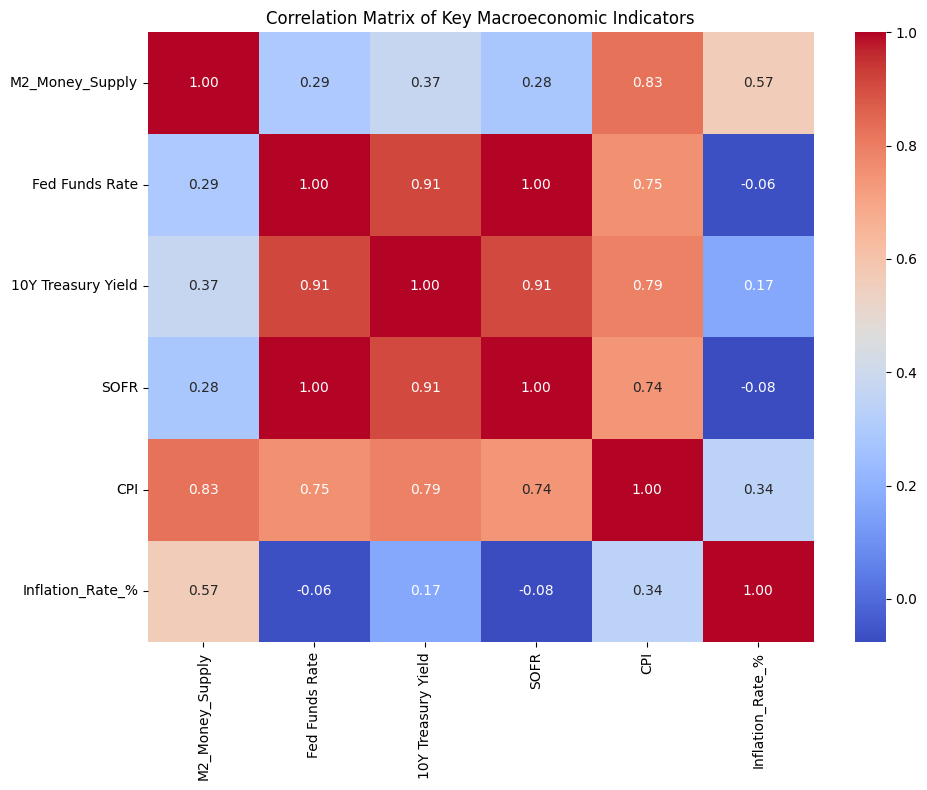

In [4]:
plt.figure(figsize=(10, 8))
correlation = df[['M2_Money_Supply', 'Fed Funds Rate', '10Y Treasury Yield', 'SOFR', 'CPI', 'Inflation_Rate_%']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Key Macroeconomic Indicators")
plt.tight_layout()
plt.show()


In [5]:
rate_change = df[['Date', 'Fed Funds Rate']].copy()
rate_change['Change'] = rate_change['Fed Funds Rate'].diff()

# Show where rate increased by more than 0.25%
rate_hikes = rate_change[rate_change['Change'] > 0.25]

print("Significant Fed Funds Rate increases:")
print(rate_hikes)


Significant Fed Funds Rate increases:
            Date  Fed Funds Rate  Change
1064  2022-05-02            0.77    0.44
1086  2022-06-01            1.21    0.44
1108  2022-07-01            1.68    0.47
1129  2022-08-01            2.33    0.65
1174  2022-10-03            3.08    0.52
1195  2022-11-01            3.78    0.70
1217  2022-12-01            4.10    0.32


In [6]:
# Create a 6-month lag of inflation
df['Inflation_Lag6'] = df['Inflation_Rate_%'].shift(-6)

# Correlation between Fed rate and future inflation
correlation = df[['Fed Funds Rate', 'Inflation_Lag6']].corr()
print(correlation)

                Fed Funds Rate  Inflation_Lag6
Fed Funds Rate        1.000000       -0.081836
Inflation_Lag6       -0.081836        1.000000


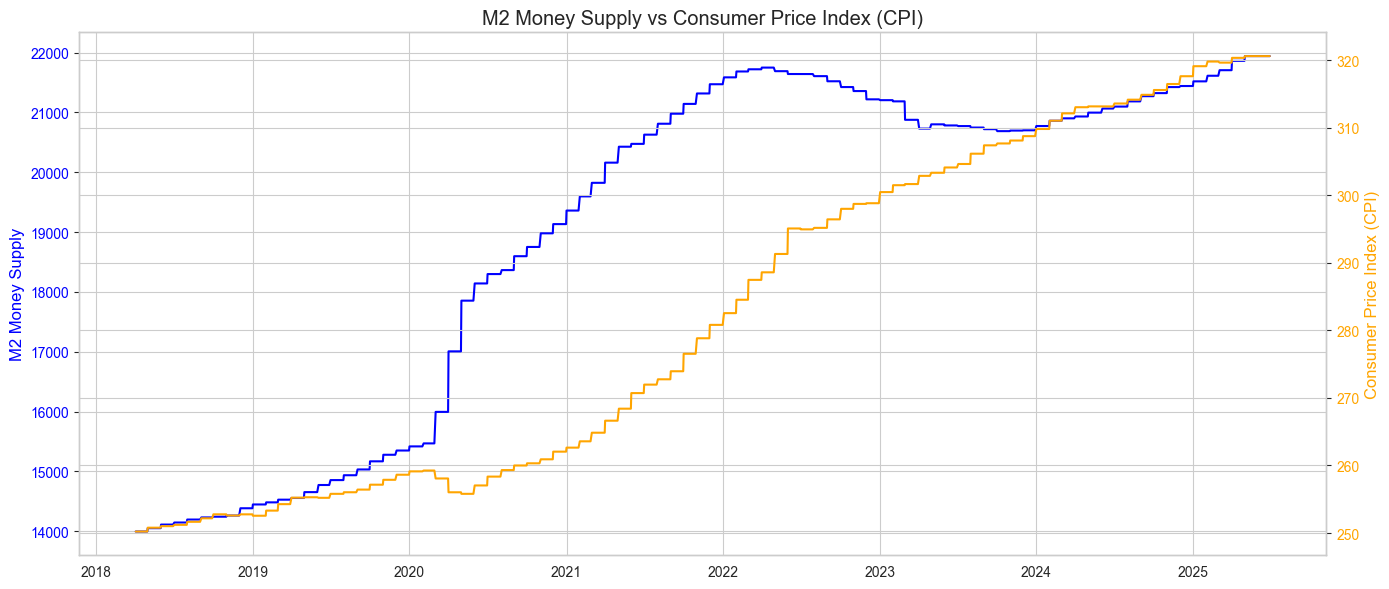

Correlation between M2 and CPI: 0.8265


In [ ]:
# --- Plot M2 Money Supply vs CPI ---
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Plot M2 Money Supply on left y-axis
ax1 = plt.gca()
ax1.plot(df['Date'], df['M2_Money_Supply'], color='blue', label='M2 Money Supply (Billion USD)')
ax1.set_ylabel('M2 Money Supply', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot CPI on right y-axis
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['CPI'], color='orange', label='CPI')
ax2.set_ylabel('Consumer Price Index (CPI)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('M2 Money Supply vs Consumer Price Index (CPI)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

# --- Correlation between M2 and CPI ---
correlation = df['M2_Money_Supply'].corr(df['CPI'])
print(f"Correlation between M2 and CPI: {correlation:.4f}")

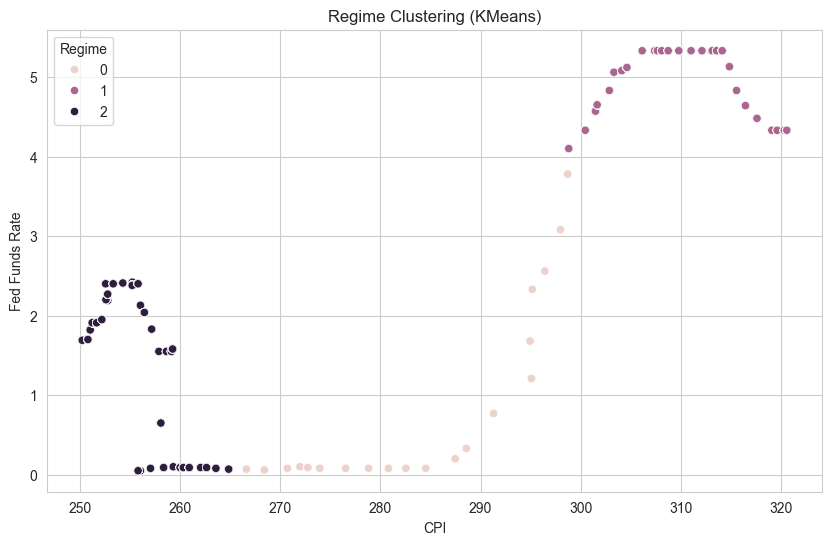

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# --- Select features for clustering ---
features = ['CPI', 'Fed Funds Rate', 'M2_Money_Supply', 'Inflation_Rate_%']  # Bạn có thể thêm 'GDP' nếu có
df_selected = df[features].copy()

# --- Handle missing values ---
df_selected = df_selected.dropna()

# --- Standardize the data ---
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected)

# --- Apply KMeans Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# --- Add cluster labels to dataframe ---
df['Regime'] = -1 
df.loc[df_selected.index, 'Regime'] = clusters

# --- Visualize ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='CPI', y='Fed Funds Rate', hue='Regime', data=df)
plt.title("Regime Clustering (KMeans)")
plt.xlabel("CPI")
plt.ylabel("Fed Funds Rate")
plt.legend(title='Regime')
plt.show()

